In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [480]:
#import and assign the dataset
dataset = pd.read_csv('Programming/Python/ML_Subscription/appdata10.csv')

In [453]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [454]:
dataset.hour.str.slice(1,3).astype(int)

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [455]:
#creates a copy of dataset with less columns. These columns are not currently important
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled', 'enrolled_date', 'first_open'])

In [456]:
plt.suptitle('Histograms of Numerical Columns:', fontsize = 20)

Text(0.5, 0.98, 'Histograms of Numerical Columns:')

<Figure size 432x288 with 0 Axes>

In [457]:
#visualize the data

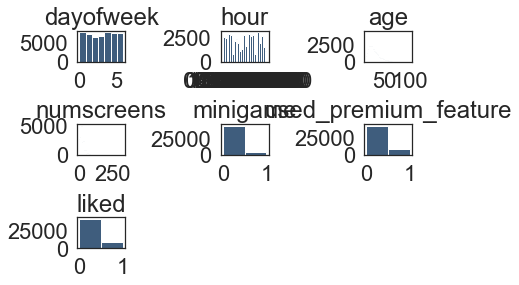

In [458]:
#creates the graph
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D7D')
plt.subplots_adjust(hspace = 2, wspace = 2)

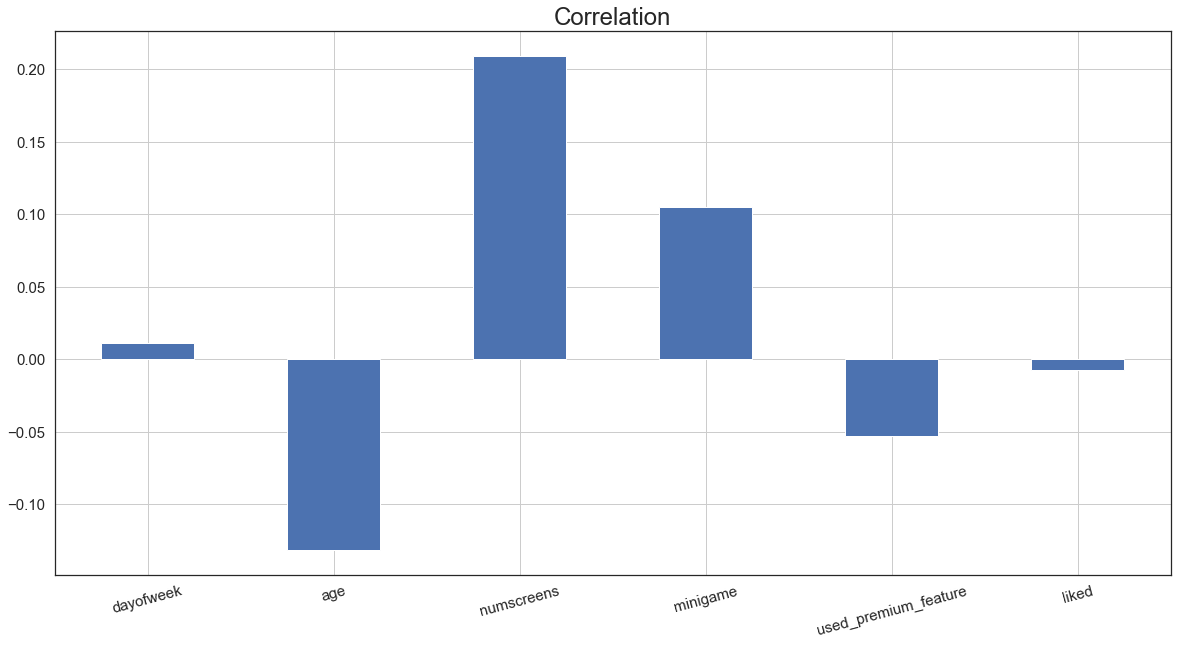

In [459]:
#Find what the correlation between enrollment and the other columns are
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10), title = "Correlation", fontsize = 15, rot = 15, grid = True)

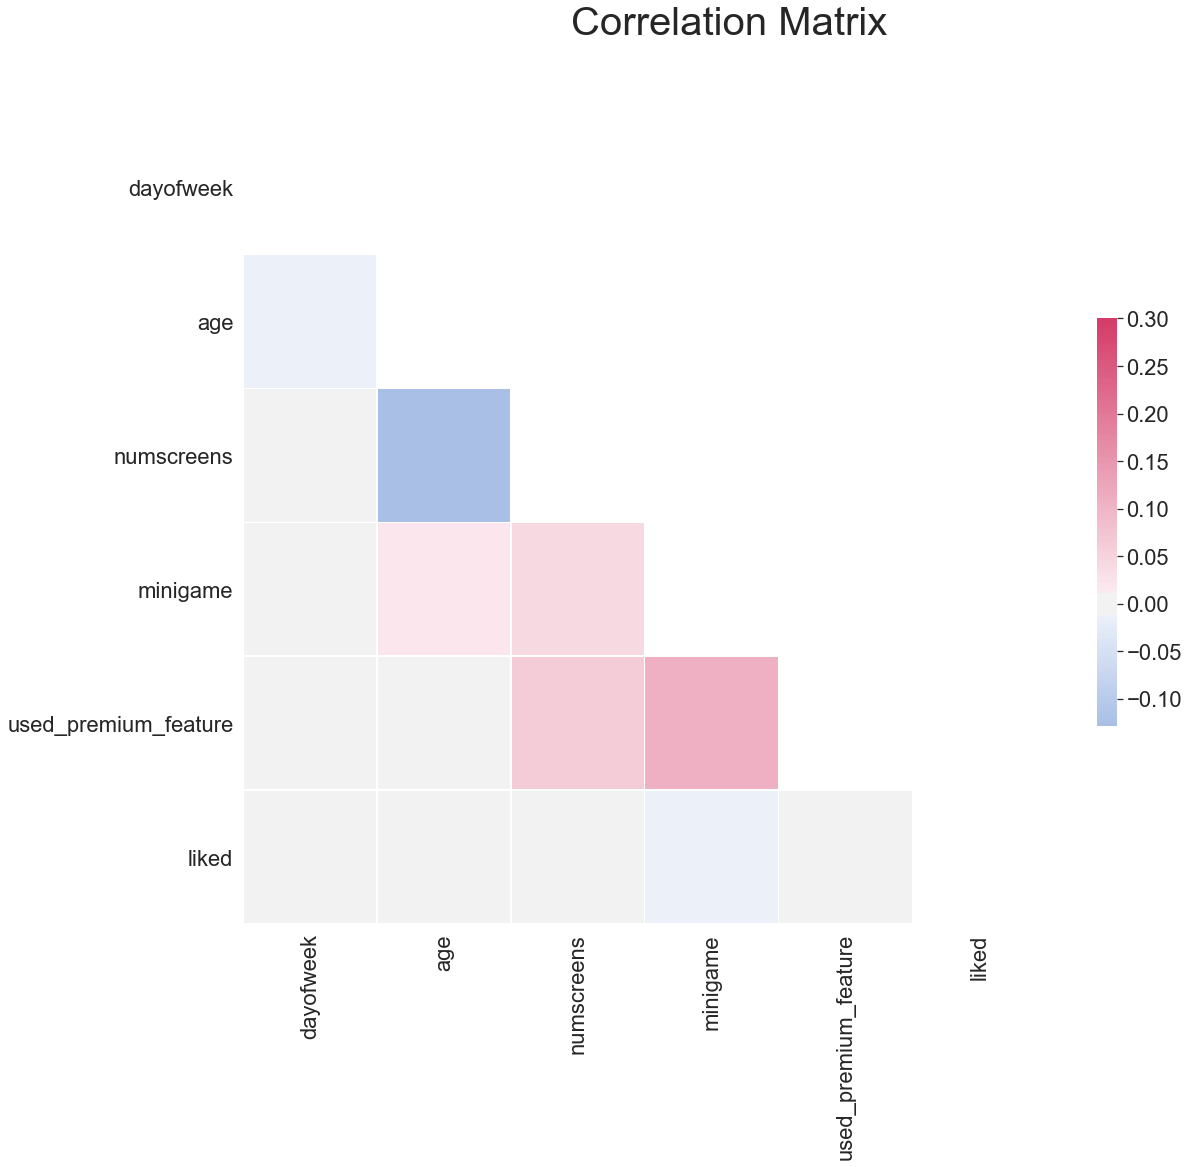

In [460]:
#correlation matrix
sns.set(style='white', font_scale = 2)
#compute the correlation matrix
corr = dataset2.corr()
#Generate mask for upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
#set up the matplotlib figure
fig, axes = plt.subplots(figsize = (18, 15))
fig.suptitle("Correlation Matrix", fontsize = 40)
#create a custom diverging colormap
cmap = sns.diverging_palette(255, 0, as_cmap = True)
#draws the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [461]:
#convert the dates to a date-type object
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [462]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

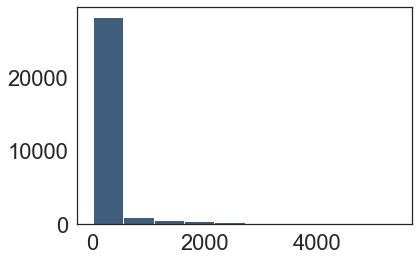

In [463]:
plt.hist(dataset['difference'].dropna(), color='#3F5D7D')
plt.title='Distribution of time since enrollment'
plt.show()

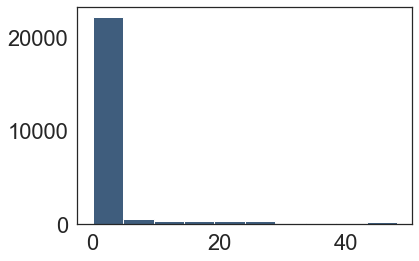

In [464]:
plt.hist(dataset['difference'].dropna(), color='#3F5D7D', range=[0,48])
plt.title='Distribution of time since enrollment'

In [465]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [466]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [467]:
#find the top screens that people visited
top_screen = pd.read_csv('Programming/Python/ML_Subscription/top_screens.csv', sep=r'\s*,\s*', engine='python').top_screens.values

In [468]:
top_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [469]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [470]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",", "")

In [471]:
dataset['other'] = dataset.screen_list.str.count(",")

In [472]:
#funnel
savings_screens = ['Saving1',
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [473]:
cm_screens = ['Credit1',
                    "Credit2",
                    "Credit3",
                    "Credit3Container",
                    "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [474]:
cc_screens = ['CC1',
                    "CC1Category",
                    "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [475]:
loan_screens = ['Loan',
                    "Loan2",
                    "Loan3",
                       "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [476]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,02:00:00,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19:00:00,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16:00:00,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18:00:00,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,10,0,2,0,1


In [479]:
dataset.to_csv("Programming/Python/ML_Subscription/new_appData10.csv", index=False)